<a href="https://colab.research.google.com/github/NandniJ21/feynn-labs-internship/blob/main/ev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas  as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



In [7]:
df=pd.read_csv("/content/ev.csv")

In [8]:
df.size

1818

In [9]:
df.shape

(202, 9)

In [10]:
df.columns.values.tolist()

['no',
 'region',
 'address',
 'aux addres',
 'latitude',
 'longitude',
 'type',
 'power',
 'service']

In [11]:
features = ['no','region','address', 'aux addres','latitude','longitude','type','power','service']

In [12]:
df.tail()

,no,region,address,aux addres,latitude,longitude,type,power,service
197,198,ANERT,"State Council For Child Welfare, CV Raman Pill...","Electric Vehicle Charger, State Council For Ch...",8.491622,76.956247,CCS/ChADEMO/ Type 2 AC,142kW,Self Service
198,199,ANERT,"Shanghumukham beach, thiruvananthapuram,Kerala...","Electric Vehicle Charger, Shanghumukham beach,...",8.481051,76.912622,DC-001,15 kW,Self Service
199,200,ANERT,"KTDC Tourist Reception Centre Shanmugham road,...","Electric Vehicle Charger, KTDC Tourist Recepti...",9.976921,76.277781,DC-001,15 kW,Self Service
200,201,ANERT,"State Council For Child Welfare, CV Raman Pill...","Electric Vehicle Charger, State Council For Ch...",8.491622,76.956247,DC-001,15 kW,Self Service
201,202,SDMC,"EESL PVR Priya Vasant Vihar, SDMC parking New ...","Electric Vehicle Charger, EESL PVR Priya Vasan...",28.557662,77.157684,DC-001,15 kW,Self Service


In [13]:
df.shape

(202, 9)

In [14]:
df.dtypes

no              int64
region         object
address        object
aux addres     object
latitude      float64
longitude     float64
type           object
power          object
service        object
dtype: object

In [15]:
df.isnull().sum()

no            0
region        0
address       0
aux addres    0
latitude      0
longitude     0
type          0
power         0
service       0
dtype: int64

In [16]:
df.columns

Index(['no', 'region', 'address', 'aux addres', 'latitude', 'longitude',
       'type', 'power', 'service'],
      dtype='object')

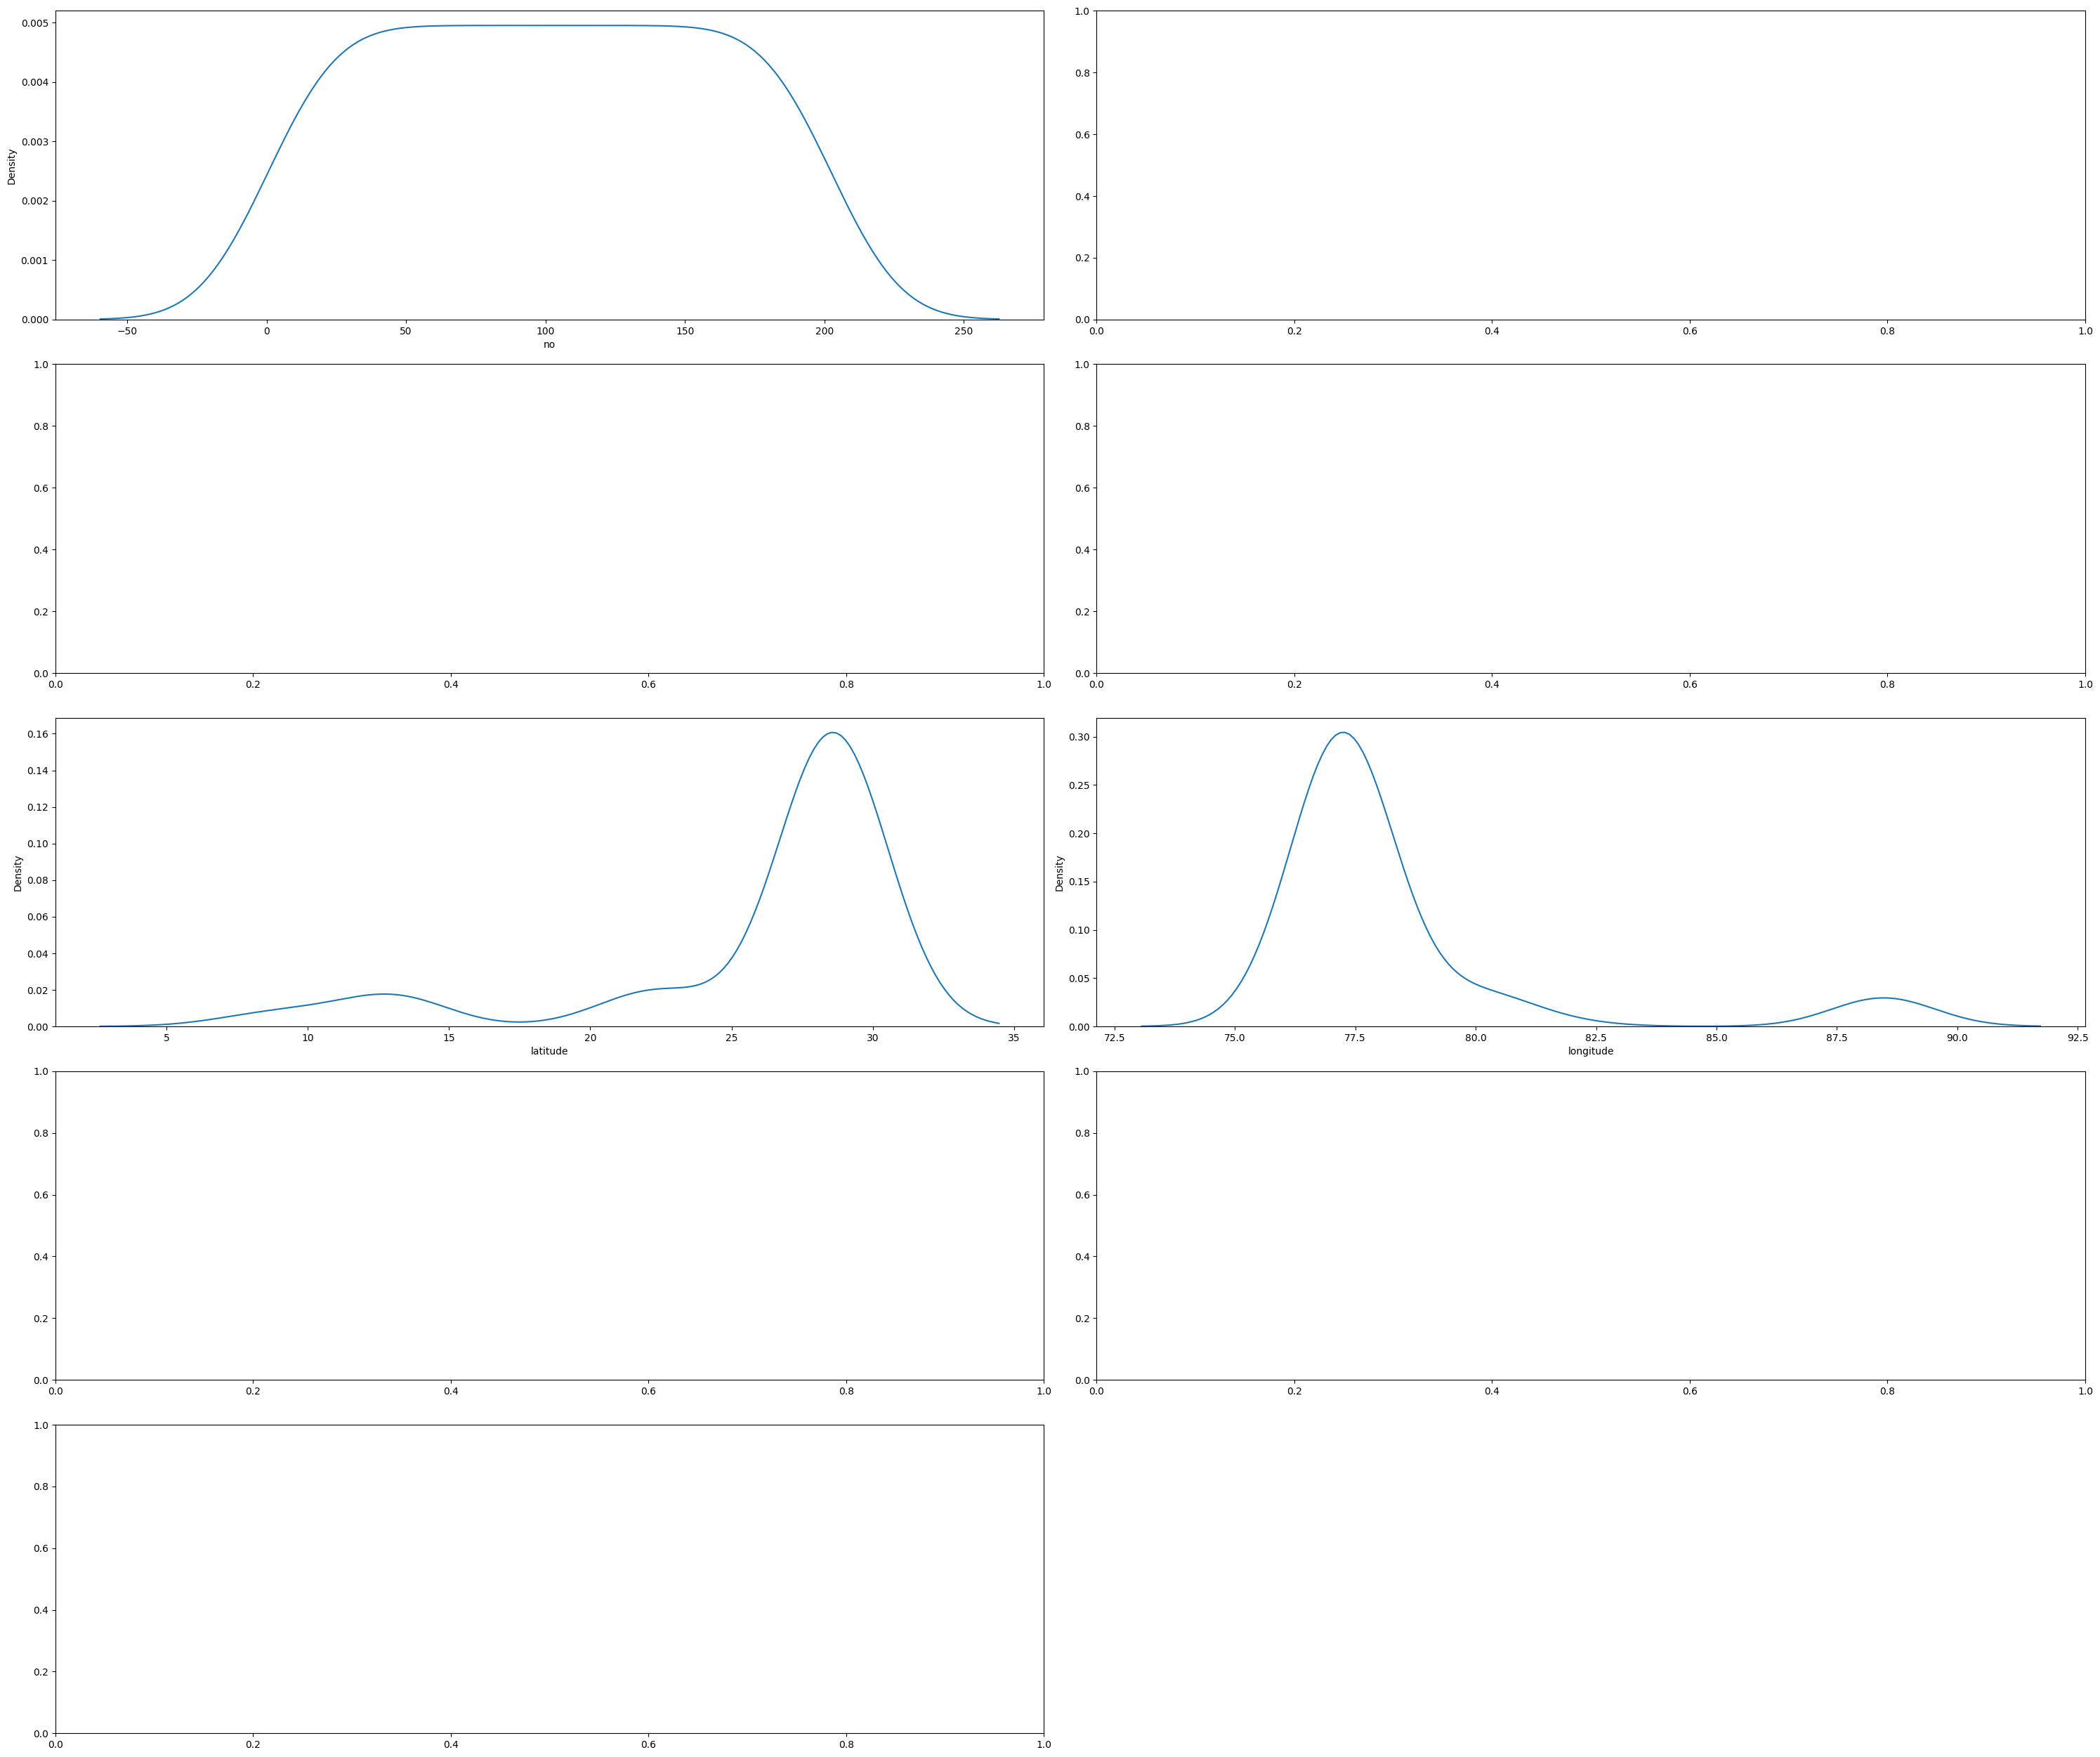

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

# Create a figure with subplots
fig, axes = plt.subplots(9, 2, figsize=(30, 45))

# Flatten the axes array to make it easier to iterate through
axes = axes.flatten()

# Iterate through DataFrame columns
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        # Set the label for the x-axis
        axes[i].set_xlabel(col)
        # Create a KDE plot on the current subplot
        sns.kdeplot(df[col], ax=axes[i])


for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])


fig.tight_layout()
plt.show()


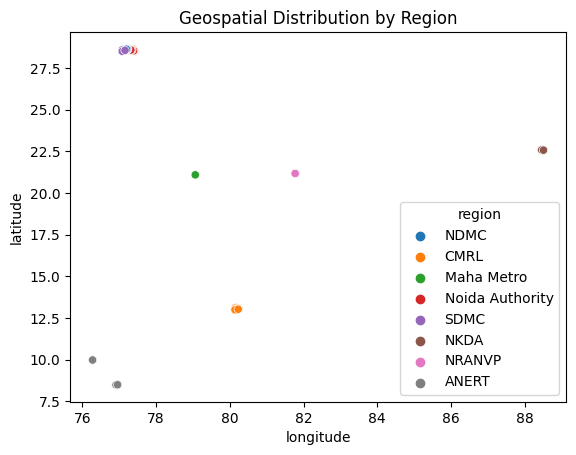

In [18]:
sns.scatterplot(x='longitude', y='latitude', data=df, hue='region')
plt.title('Geospatial Distribution by Region')
plt.show()


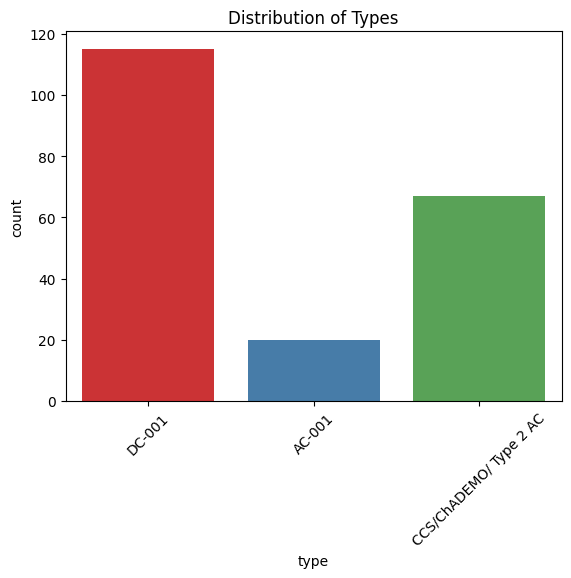

In [19]:
sns.countplot(x='type', data=df, palette='Set1')
plt.title('Distribution of Types')
plt.xticks(rotation=45)
plt.show()


<ipython-input-20-93be563067a6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[['latitude', 'longitude', 'power', 'service']].corr()


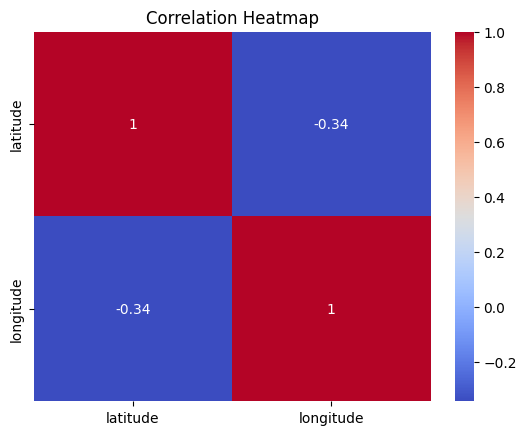

In [20]:
correlation_matrix = df[['latitude', 'longitude', 'power', 'service']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [21]:
power = df['power']
power

0      15 kW
1      15 kW
2      15 kW
3      15 kW
4      15 kW
       ...  
197    142kW
198    15 kW
199    15 kW
200    15 kW
201    15 kW
Name: power, Length: 202, dtype: object

In [22]:
listnew=[]
for i in power:
  listnew.append(i)
print(listnew)


['15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '10(3.3 kW each)', '15 kW', '10(3.3 kW each)', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '10(3.3 kW each)', '15 kW', '10(3.3 kW each)', '15 kW', '10(3.3 kW each)', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '10(3.3 kW each)', '15 kW', '10(3.3 kW each)', '15 kW', '10(3.3 kW each)', '15 kW', '10(3.3 kW each)', '15 kW', '10(3.3 kW each)', '15 kW', '10(3.3 kW each)', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '15 kW', '142kW', '142kW', '142kW', '142kW', '142kW', '142kW', '142kW', '15 kW', '15 kW'

In [23]:
final = []
new=[0,5]
for data in listnew:
  for j in data:
    if data[1] in new:
      final.append(data[:1])
    else:
      final.append(data[:2])
print(final)

['15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '10', '10

In [24]:
fin = []
for i in final:
  fin.append(int(i))
print(fin)

[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 15, 15, 15, 15, 15, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,

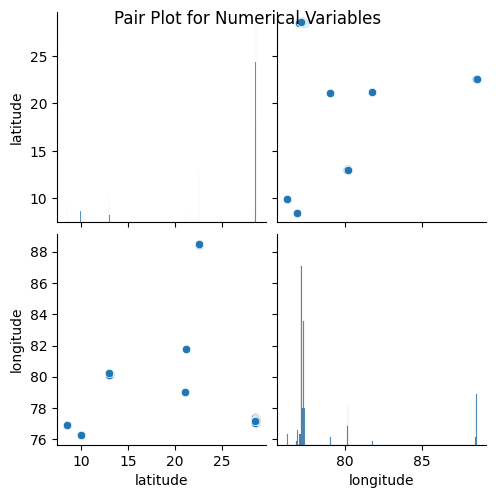

In [25]:
sns.pairplot(df[['latitude', 'longitude', 'power', 'service']])
plt.suptitle('Pair Plot for Numerical Variables')
plt.show()

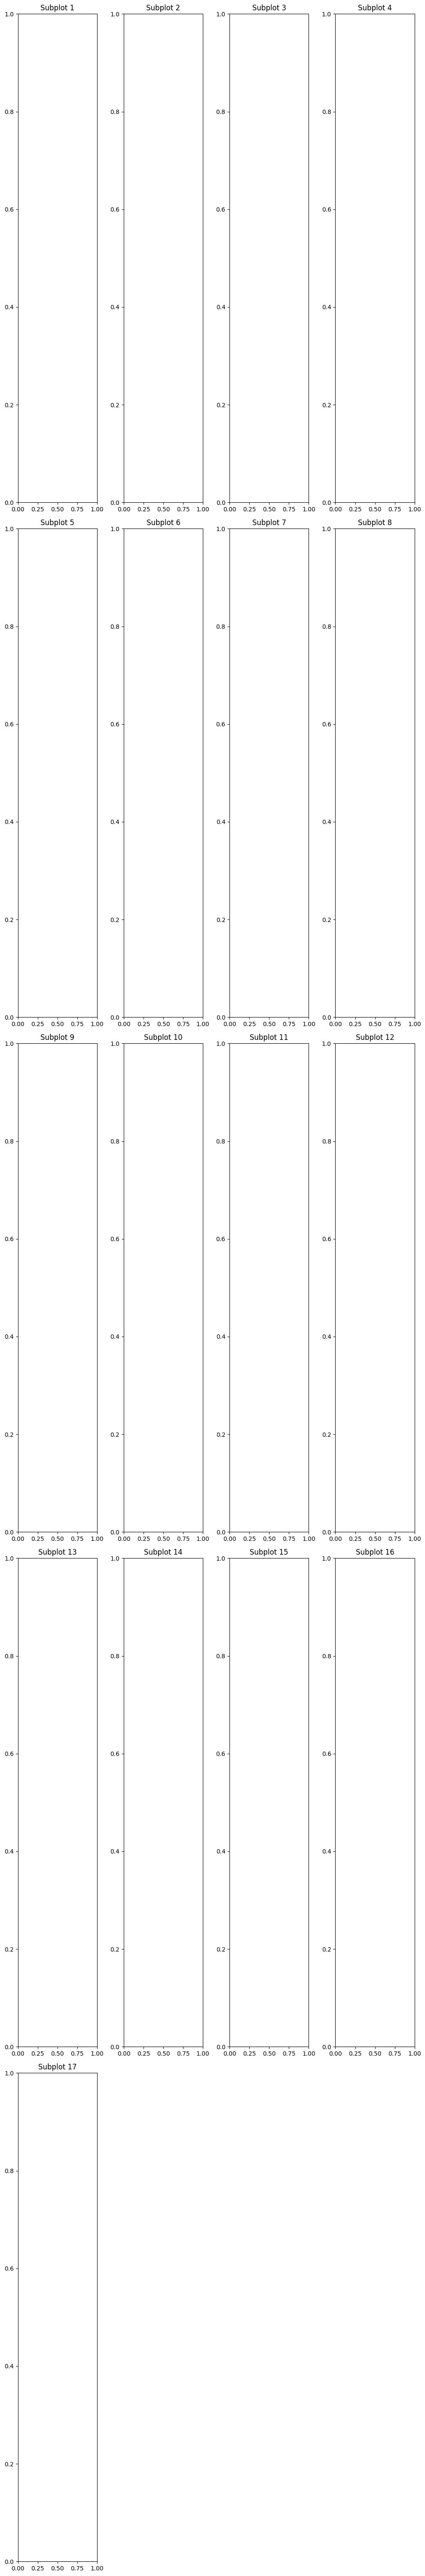

In [26]:
import matplotlib.pyplot as plt

# Number of subplots you want to create
num_subplots = 17  # Adjust this number according to your needs

# Calculate the grid dimensions (rows and columns)
# Here, we aim for a roughly square grid
num_rows = int(num_subplots**0.5)
num_cols = num_subplots // num_rows

# If there are extra subplots, add an additional row
if num_rows * num_cols < num_subplots:
    num_rows += 1

# Create a figure with the calculated grid dimensions
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 60))

# Loop through the subplots (assuming you have data for each subplot)
for i, ax in enumerate(axes.flat):
    if i < num_subplots:
        # Create a subplot and plot your data
        ax.set_title(f'Subplot {i + 1}')
        # Plot your data here using df.columns[i]
    else:
        # Remove any extra empty subplots
        fig.delaxes(ax)

# Adjust subplot spacing
fig.tight_layout()

# Show the plots
plt.show()


Number of Rows: 3
Number of Columns: 4


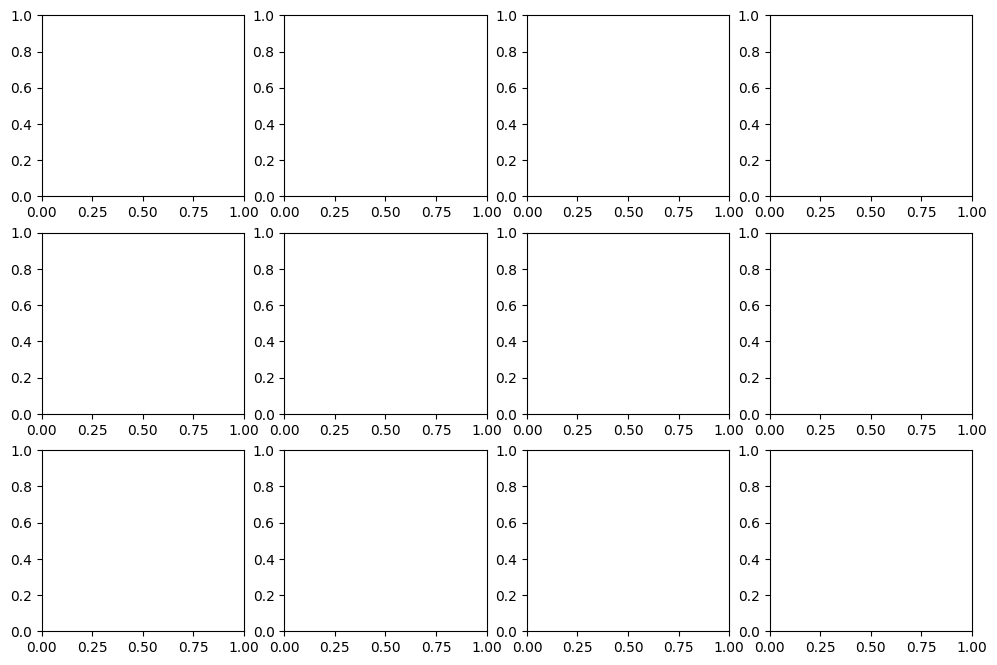

In [27]:



fig, axes = plt.subplots(3, 4, figsize=(12, 8))  # Example layout

# Your plotting code goes here

# Calculate the actual grid dimensions based on the created subplots
num_rows, num_cols = len(axes), len(axes[0])

# Display the actual grid dimensions
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}")

# Show the plots
plt.show()


<ipython-input-28-930904f0e3bc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


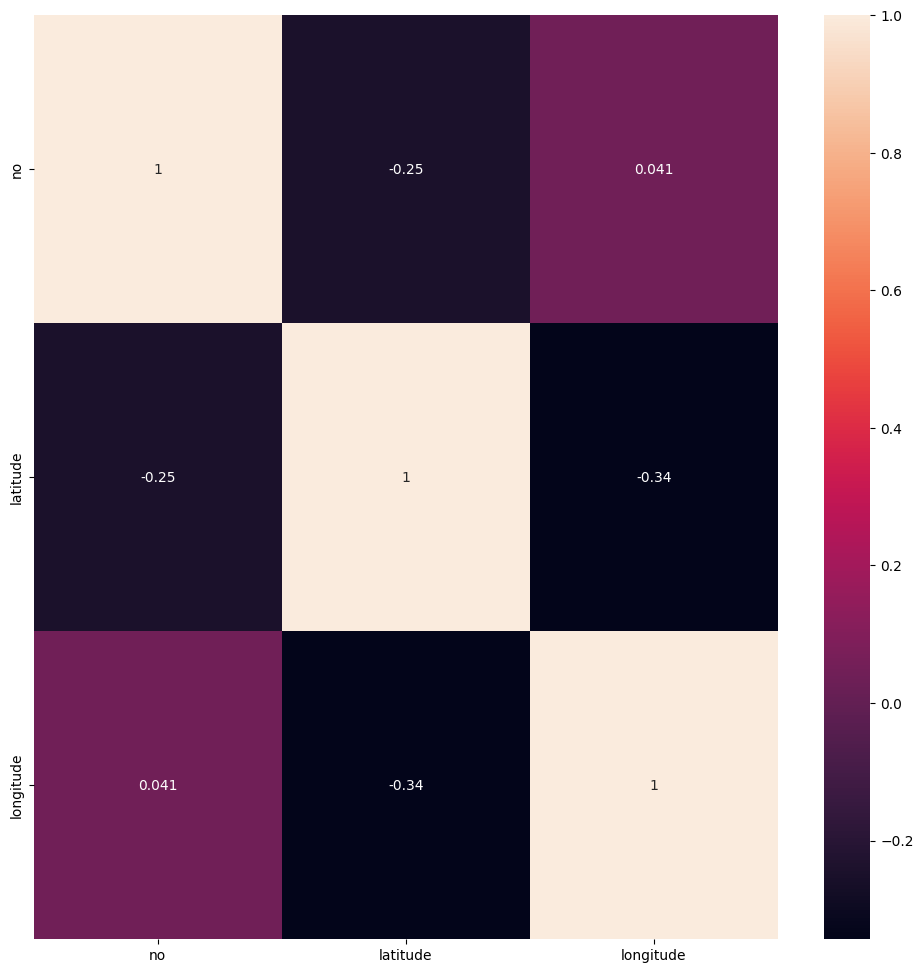

In [28]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)
plt.show()



In [58]:
X = df.iloc[:,[4,5]].values
print(X)

[[28.6007255 77.2262524]
 [28.6007255 77.2262524]
 [28.5883031 77.2176972]
 [28.5826538 77.2200872]
 [28.584485  77.220316 ]
 [28.6023562 77.1866178]
 [28.6336861 77.2181403]
 [28.6304482 77.2255578]
 [28.5838828 77.163408 ]
 [28.6003333 77.2268889]
 [28.633675  77.2234929]
 [28.6325843 77.2229787]
 [28.6317294 77.2221076]
 [28.633841  77.2074439]
 [28.6281626 77.2155151]
 [28.6281626 77.2155151]
 [28.6350113 77.2196112]
 [28.6338828 77.2215424]
 [28.6318964 77.2215824]
 [28.6242518 77.2125818]
 [28.5772318 77.1972385]
 [28.6337975 77.2174553]
 [28.5838046 77.2218225]
 [28.617783  77.2129959]
 [28.617783  77.2129959]
 [28.6268691 77.231853 ]
 [28.5852879 77.177094 ]
 [28.586617  77.19364  ]
 [28.586617  77.19364  ]
 [28.6336306 77.220579 ]
 [28.6329899 77.2179805]
 [28.6340719 77.2187798]
 [12.9959222 80.2102867]
 [12.9959222 80.2102867]
 [21.0868801 79.0635586]
 [21.0868801 79.0635586]
 [28.5853056 77.191    ]
 [28.6222241 77.2142492]
 [28.6023562 77.1866178]
 [28.5852879 77.177094 ]


In [ ]:
wcss =[]

for i in range(1,11):
  kmeans= KMeans (n_clusters=i,init= 'k-means++', random_state=100)
  kmeans.fit(X)


  wcss.append(kmeans.inertia_)



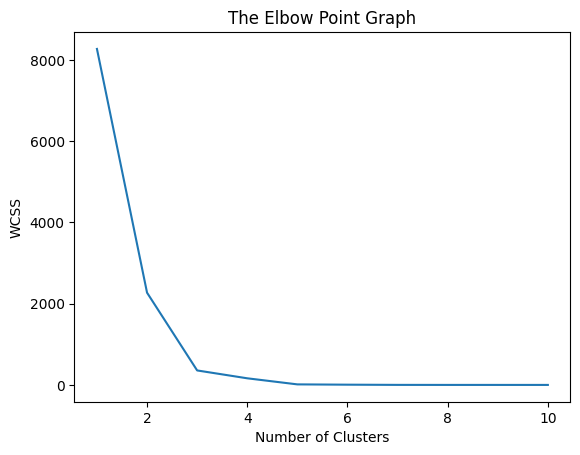

In [65]:
sns.set
plt.plot(range(1,11),wcss)

plt.title( 'The Elbow Point Graph')

plt.xlabel('Number of Clusters')

plt.ylabel('WCSS')
plt.show()

In [67]:
from sklearn.cluster import KMeans

n_clusters = 3
n_init = 20  # Set n_init explicitly

kmeans = KMeans(n_clusters=n_clusters, n_init=n_init)
kmeans = KMeans(n_clusters =3, init='k-means++', random_state=0)
# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 1 1 2 2 2 2 0 0 0 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


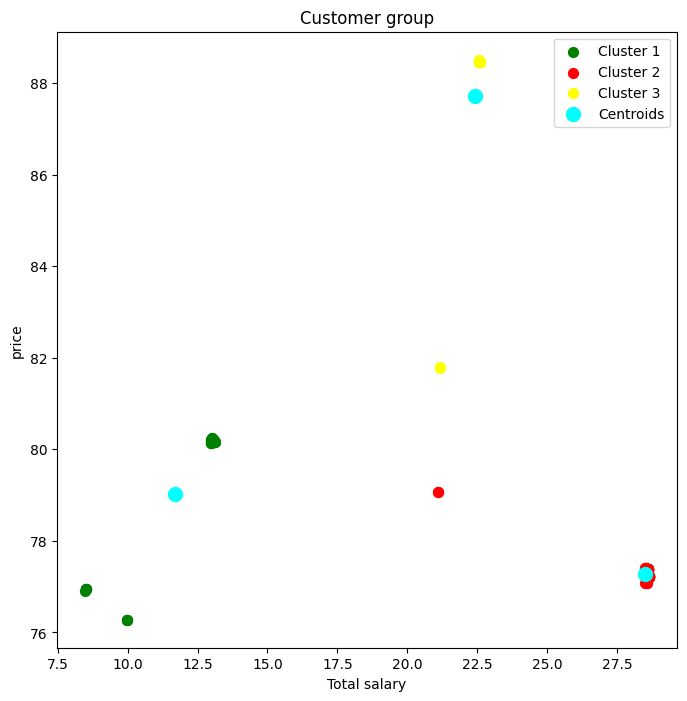

In [68]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# for plotting clusters
plt.figure(figsize=(8, 8))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s=50, c='yellow', label='Cluster 3')

# Plottiing the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='cyan', label='Centroids')
plt.title('Customer group')
plt.xlabel("Total salary")
plt.ylabel("price")
plt.legend()
plt.show()

In [46]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


selected_attributes = ['latitude', 'longitude']
X = df[selected_attributes]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


n_components = 2
pca = PCA(n_components=n_components)

principal_components = pca.fit_transform(X_scaled)


column_names = [f"PCA_Component_{i+1}" for i in range(n_components)]

pca_df = pd.DataFrame(data=principal_components, columns=column_names)


print(pca_df)


     PCA_Component_1  PCA_Component_2
0          -0.605905        -0.060469
1          -0.605905        -0.060469
2          -0.606295        -0.056944
3          -0.605035        -0.056777
4          -0.605213        -0.057061
..               ...              ...
197         1.870473         2.539483
198         1.861824         2.550801
199         1.527740         2.507268
200         1.870473         2.539483
201        -0.616160        -0.039343

[202 rows x 2 columns]


df = pd.DataFrame({
    'latitude': [28.6007255,28.6007255,28.5883031,28.5826538,28.584485,28.6023562,28.6336861,28.6304482,28.5838828,28.6003333,28.633675,28.6325843],
    'longitude' : [77.2262524,77.2262524,77.2262524,77.2262524,77.2262524,77.2262524,77.2262524,77.2262524,77.2262524,77.2262524,77.2262524,77.2229787]
    })
features = df[['latitude','longitude']]

num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters)
df['cluster'] = kmeans.fit_predict(features)

# Plot the clusters
plt.scatter(df['latitude'],df['longitude'], c=df['cluster'], cmap='rainbow')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Charging Station Clusters')
plt.show()

print(df)


print(df.columns)
df.columns = df.columns.str.strip()


In [30]:
from sklearn.model_selection import train_test_split

X = df[['latitude', 'longitude']]  # Features
y = df['power']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=4)

# Train the model
knn.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(confusion)






Accuracy: 0.49
Classification Report:
                 precision    recall  f1-score   support

10(3.3 kW each)       0.31      0.80      0.44         5
          142kW       0.44      0.54      0.48        13
          15 kW       0.75      0.39      0.51        23

       accuracy                           0.49        41
      macro avg       0.50      0.58      0.48        41
   weighted avg       0.60      0.49      0.50        41

Confusion Matrix:
[[4 1 0]
 [3 7 3]
 [6 8 9]]


In [31]:
import pandas as pd

data_frame =pd.read_csv("/content/Indian automoble buying behavour study 1.0.csv")

In [32]:
data_frame.size

1287

In [33]:
data_frame.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [75]:
data_frame.tail()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000
98,51,Salaried,Married,Post Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000


In [34]:
data_frame.shape

(99, 13)

In [51]:
print(data_frame.dtypes)


Age                  int64
Profession          object
Marrital Status     object
Education           object
No of Dependents     int64
Personal loan       object
House Loan          object
Wife Working        object
Salary               int64
Wife Salary          int64
Total Salary         int64
Make                object
Price                int64
dtype: object


In [35]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [36]:
data_frame.isnull(). sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

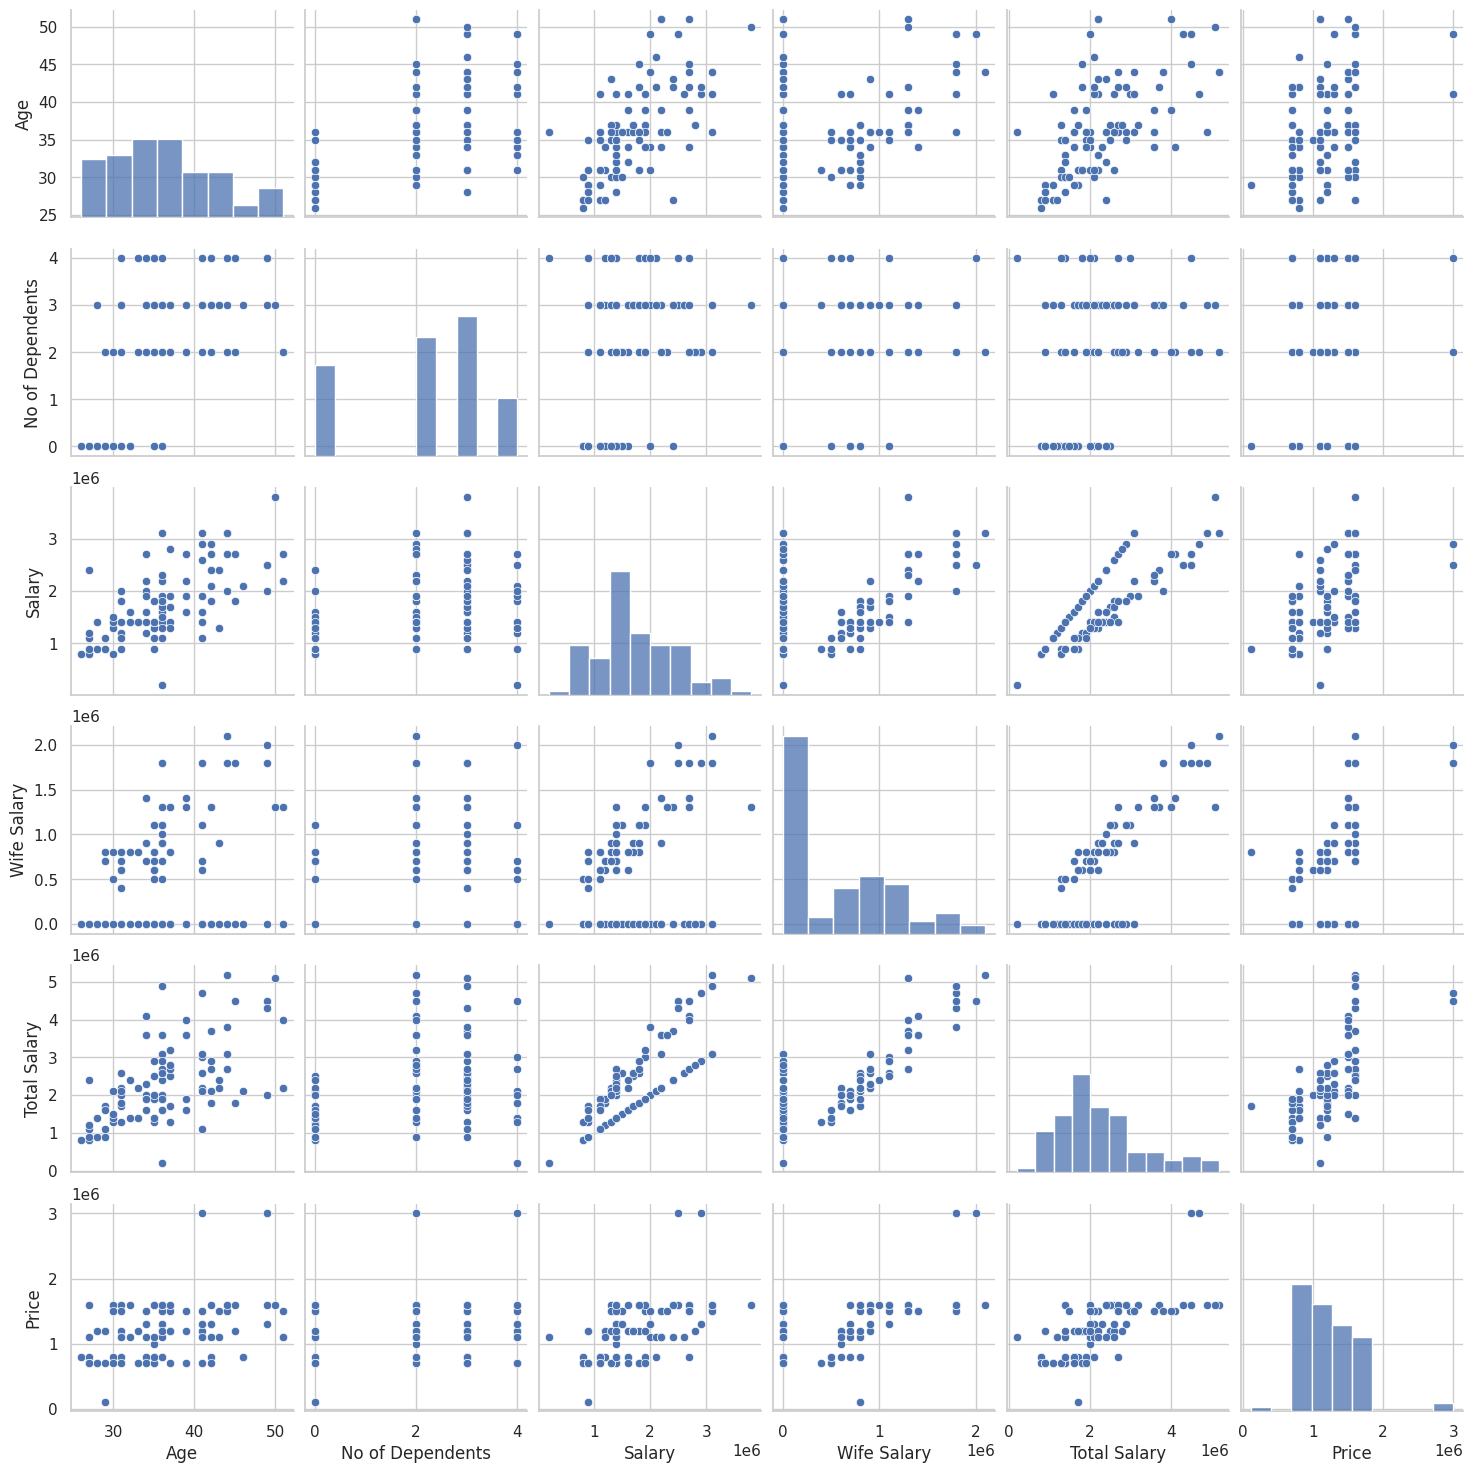

In [70]:
# Set the style of the plots
sns.set(style="whitegrid")

# Select the attributes you want to visualize
attributes_to_visualize = ['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
                           'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
                           'Total Salary', 'Make', 'Price']

# Create a pairplot to visualize pairwise relationships between attributes
sns.pairplot(data_frame[attributes_to_visualize])
plt.show()

<ipython-input-71-1888f1f8e07b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_frame[attributes_to_visualize].corr()


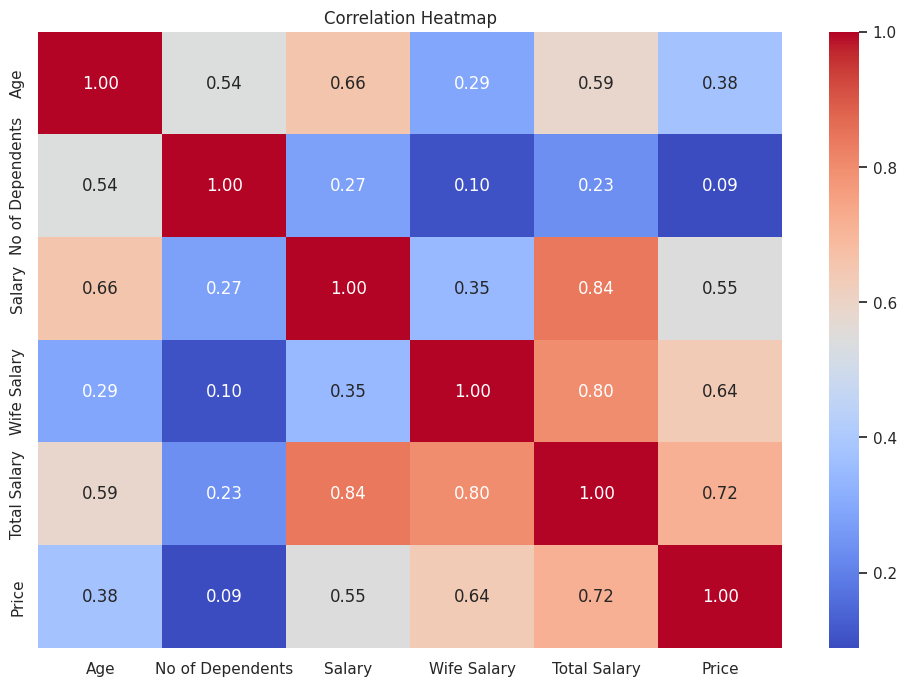

In [71]:
correlation_matrix = data_frame[attributes_to_visualize].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

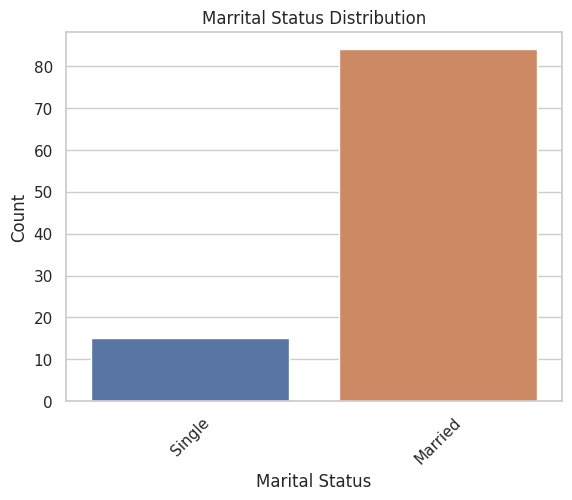

In [73]:
sns.countplot(data=data_frame, x='Marrital Status')
plt.title("Marrital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

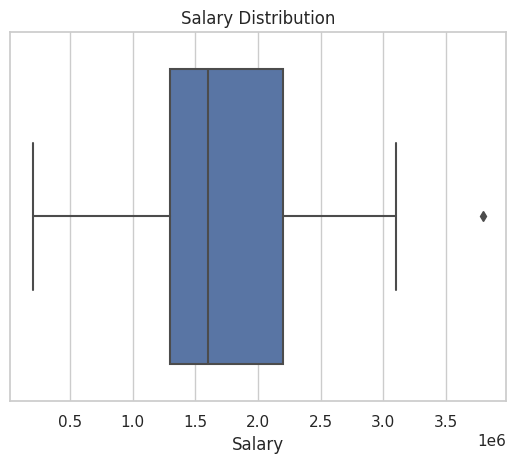

In [74]:
# Create a box plot to visualize the distribution of a numerical attribute (e.g., 'Salary')
sns.boxplot(data=data_frame, x='Salary')
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.show()

In [37]:
X = data_frame.iloc[:,[10,12]].values
print(X)

[[ 800000  800000]
 [2000000 1000000]
 [1800000 1200000]
 [2200000 1200000]
 [2600000 1600000]
 [ 900000  700000]
 [1800000 1200000]
 [1400000  700000]
 [2000000 1100000]
 [1900000  800000]
 [2000000 1600000]
 [1400000  700000]
 [1700000  110000]
 [1400000  800000]
 [1300000  700000]
 [4500000 3000000]
 [ 800000  800000]
 [ 800000  700000]
 [ 900000 1200000]
 [1300000  700000]
 [2500000 1200000]
 [1900000  800000]
 [2400000 1600000]
 [1400000  700000]
 [2000000 1100000]
 [2900000 1600000]
 [1300000  700000]
 [1600000  800000]
 [2600000 1200000]
 [2700000 1600000]
 [1100000  700000]
 [2100000 1300000]
 [3000000 1500000]
 [2200000 1500000]
 [2100000 1100000]
 [3700000 1600000]
 [1600000 1200000]
 [2100000 1500000]
 [1400000 1600000]
 [2200000 1100000]
 [1700000  800000]
 [1400000 1100000]
 [2400000 1600000]
 [2300000 1300000]
 [1600000  800000]
 [3600000 1500000]
 [ 200000 1100000]
 [2600000 1300000]
 [1600000  800000]
 [3100000 1500000]
 [2000000 1300000]
 [4300000 1600000]
 [2700000 16

##  wcss ->> Within cluster Sum of squares

In [ ]:
wcss =[]

for i in range(1,11):
  kmeans= KMeans (n_clusters=i,init= 'k-means++', random_state=42)
  kmeans.fit(X)


  wcss.append(kmeans.inertia_)



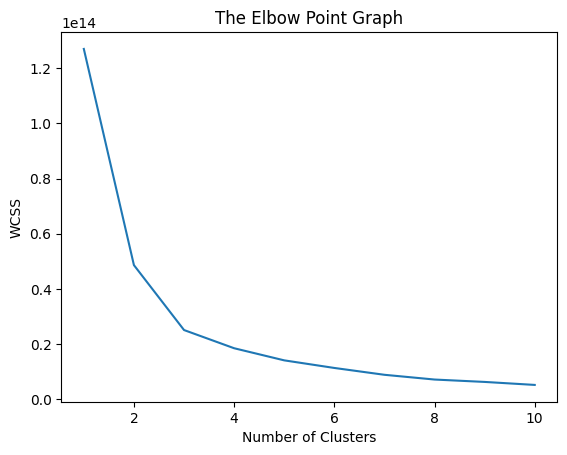

In [39]:
sns.set
plt.plot(range(1,11),wcss)

plt.title( 'The Elbow Point Graph')

plt.xlabel('Number of Clusters')

plt.ylabel('WCSS')
plt.show()



optimum number of clusters=3


Training the K-Means clustering model

In [40]:



from sklearn.cluster import KMeans

n_clusters = 3
n_init = 20  # Set n_init explicitly

kmeans = KMeans(n_clusters=n_clusters, n_init=n_init)
kmeans = KMeans(n_clusters =3, init='k-means++', random_state=0)
# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[0 2 0 2 2 0 0 0 2 0 2 0 0 0 0 1 0 0 0 0 2 0 2 0 2 2 0 0 2 2 0 2 2 2 2 1 0
 2 0 2 0 0 2 2 0 1 0 2 0 2 2 1 2 1 1 2 2 0 0 0 0 0 2 0 2 0 1 2 1 0 2 2 0 2
 2 1 0 2 2 1 2 1 2 2 2 0 0 2 1 0 0 1 2 0 2 1 2 1 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Visualizing the clusters

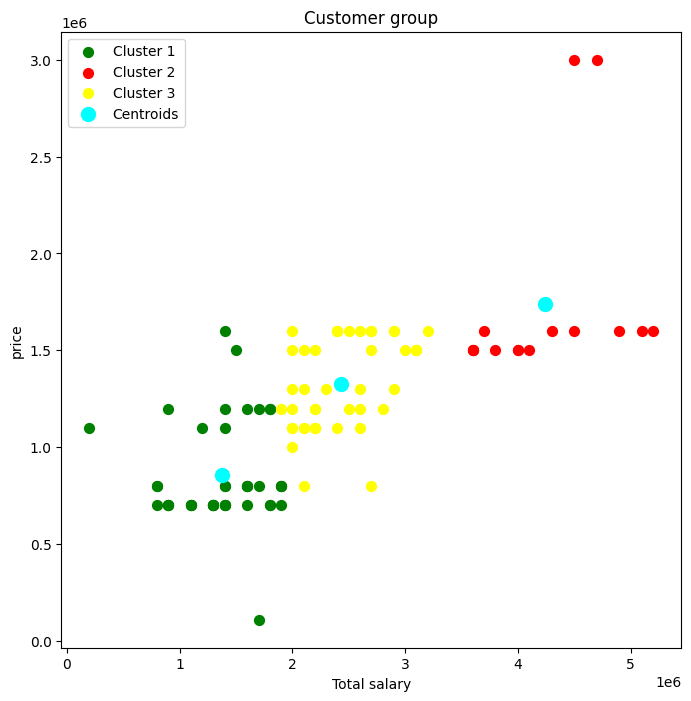

In [41]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# for plotting clusters
plt.figure(figsize=(8, 8))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s=50, c='yellow', label='Cluster 3')

# Plottiing the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='cyan', label='Centroids')
plt.title('Customer group')
plt.xlabel("Total salary")
plt.ylabel("price")
plt.legend()
plt.show()


In [54]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


selected_attributes = ['Total Salary', 'Price']
X = data_frame[selected_attributes]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_components = 2
pca = PCA(n_components=n_components)

principal_components = pca.fit_transform(X_scaled)

column_names = [f"PCA_Component_{i+1}" for i in range(n_components)]

pca_df = pd.DataFrame(data=principal_components, columns=column_names)

print(pca_df.head)


<bound method NDFrame.head of     PCA_Component_1  PCA_Component_2
0         -1.634550         0.354909
1         -0.498168        -0.131976
2         -0.308691         0.328045
3         -0.038147         0.057500
4          0.881895         0.436453
..              ...              ...
94         0.746623         0.571726
95         2.572799        -1.254450
96        -0.200521        -0.104874
97         1.666427        -0.672827
98        -0.200521        -0.104874

[99 rows x 2 columns]>


In [57]:
from sklearn.model_selection import train_test_split

X = data_frame[['Total Salary', 'Price']]  # Features
y = data_frame['Age']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=4)

# Train the model
knn.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.05
Classification Report:
              precision    recall  f1-score   support

          27       0.17      1.00      0.29         1
          29       0.00      0.00      0.00         2
          30       0.00      0.00      0.00         0
          31       0.00      0.00      0.00         4
          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         0
          34       0.00      0.00      0.00         2
          35       0.00      0.00      0.00         3
          36       0.00      0.00      0.00         3
          37       0.00      0.00      0.00         0
          39       0.00      0.00      0.00         0
          41       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         1
          50       0.00      0.00      0.00         1
          51       0.00      0.00      0.00         1

    accuracy                           0.05        20
   macro avg       0.01      0.07      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.